In [1]:
from STL_to_path import *
from GPT import *
from NL_to_STL import *
from visualization import *

         Install drake (https://drake.mit.edu/installation.html)
         to use the Drake-based solvers.


In [2]:
T_max = 20          # time horizon in seconds 
dt = 0.5            # time step in seconds
N = int(T_max/dt)   # number of time steps
max_acc = 50        # maximum acceleration in m/s^2
max_speed = 1       # maximum speed in m/s

objects = {"key" : (3.75, 4.75, 3.75, 4.75, 1., 2.),
           "chest": (-4.25, -3, -4.5, -3.75, 0., 0.75),
           "door": (0., 0.5, -2.5, -1, 0., 2.5),
           "bounds": (-5., 5., -5., 5., 0., 3.),
           "NE_inside_wall": (2., 5., 3., 3.5, 0., 3.),
           "south_mid_inside_wall": (0., 0.5, -5., -2.5, 0., 3.),
           "north_mid_inside_wall": (0., 0.5, -1., 5., 0., 3.),
           "west_inside_wall": (-2.25, -1.75, -5., 3.5, 0., 3.),
           "top_door": (0., 0.5, -2.5, -1, 2.5, 3.),
           }

x0 = np.array([0.,0.,0.,0.,0.,0.]) # initial state: x, y, z, vx, vy, vz

In [3]:
translator = NL_to_STL(objects, T_max, dt, print_instructions=False)

In [4]:
specs = translator.generate_specs()

Please specify the task. Type 'quit' to exit conversation.


User: Go to the chest
Assistant: Is there any specific constraint or condition that the drone should adhere to while going to the chest, such as avoiding certain obstacles?
User: Stay within the bounds
The final specification was generated. Exiting conversation.


In [5]:
print(specs)

['STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 20) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 20)']


In [6]:
solver = STLSolver(specs, objects, x0, T_max)

x,u = solver.generate_trajectories(dt, max_acc, max_speed, verbose=True)

Solving for spec  1  of  1
Current x0:  [0. 0. 0. 0. 0. 0.]
Current spec:  STL_formulas.inside_cuboid(objects["bounds"]).eventually(0, 20) & STL_formulas.inside_cuboid(objects["chest"]).eventually(0, 20)
Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-29
Setting up optimization problem...
Setup complete in 0.7952632904052734 seconds.
<class 'gurobipy.MQuadExpr'>
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 2160 rows, 1333 columns and 3983 nonzeros
Model fingerprint: 0xdbe3b951
Model has 123 quadratic objective terms
Variable types: 1081 continuous, 252 integer (252 binary)
Coefficient statistics:
  Matrix range     [5e-01, 1e+03]
  Objective range  [1e+00, 1e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS ra

In [7]:

#check data type of x
print(type(x))

# stop if no solution was found
if x is None:
    print("No solution found")
    exit()

print("x: ", x)

print("u: ", u)

<class 'numpy.ndarray'>
x:  [[-0.00000000e+00 -0.00000000e+00 -2.59615385e-02 -7.65182186e-02
  -1.50303644e-01 -2.45951417e-01 -3.62095142e-01 -4.97368421e-01
  -6.50404858e-01 -8.19838057e-01 -1.00430162e+00 -1.20242915e+00
  -1.41285425e+00 -1.63421053e+00 -1.86513158e+00 -2.10425101e+00
  -2.35020243e+00 -2.60161943e+00 -2.85713563e+00 -3.11538462e+00
  -3.37500000e+00 -3.63461538e+00 -3.89423077e+00 -4.15384615e+00
  -4.41346154e+00 -4.67307692e+00 -4.93269231e+00 -5.19230769e+00
  -5.45192308e+00 -5.71153846e+00 -5.97115385e+00 -6.23076923e+00
  -6.49038462e+00 -6.75000000e+00 -7.00961538e+00 -7.26923077e+00
  -7.52884615e+00 -7.78846154e+00 -8.04807692e+00 -8.30769231e+00
  -8.56730769e+00]
 [-0.00000000e+00 -0.00000000e+00 -3.17307692e-02 -9.35222672e-02
  -1.83704453e-01 -3.00607287e-01 -4.42560729e-01 -6.07894737e-01
  -7.94939271e-01 -1.00202429e+00 -1.22747976e+00 -1.46963563e+00
  -1.72682186e+00 -1.99736842e+00 -2.27960526e+00 -2.57186235e+00
  -2.87246964e+00 -3.17975709

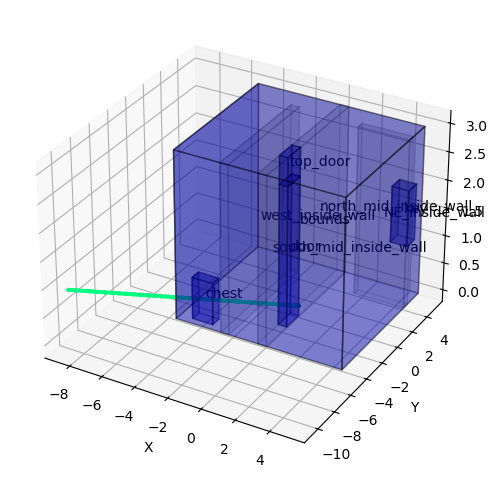

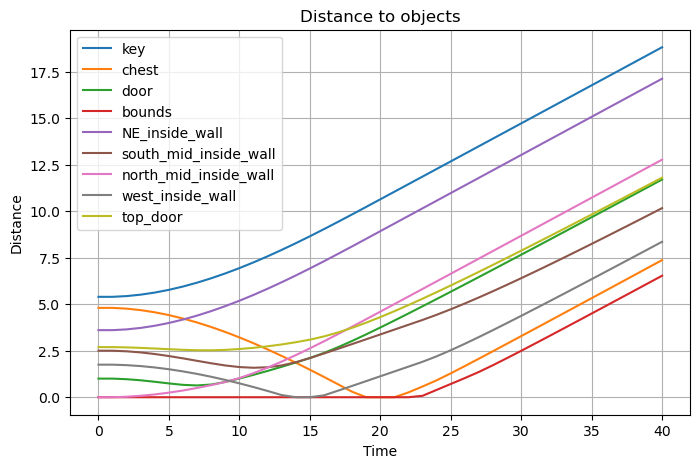

In [8]:

animate = False
visualizer = Visualization(x, objects, animate=animate)

if animate:
    gif_name = input("Enter name of GIF file: ")
    visualizer.animate_trajectory(gif_name + ".gif")

visualizer.visualize()
visualizer.plot_distance_to_objects()

plt.show()